In [ ]:
from google.colab import files
import io 
uploaded =files.upload()

Saving ds_salaries.csv to ds_salaries.csv


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df =pd.read_csv('ds_salaries.csv')

Appercu general de nos donnees

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Dans ce probleme , nous allons tenter de filtrer les donnees afin d'avoir les salaires en dollars USD d'un Data Scientist ou d'un ML engineer travaillant tous les deux au Canada et ayant la meme experience de travail .Puis nous calculerons et comparerons les salaires medians de chacun

In [ ]:
df = df.loc[((df['job_title'] == 'Data Scientist') | (df['job_title'] == 'ML Engineer')) & (df['employee_residence'] == 'CA') & (df['experience_level'] == 'SE')]
df=df[['job_title','salary_in_usd','employee_residence','experience_level']]

In [ ]:
df.head(20)

,job_title,salary_in_usd,employee_residence,experience_level
3,Data Scientist,175000,CA,SE
4,Data Scientist,120000,CA,SE
7,Data Scientist,219000,CA,SE
8,Data Scientist,141000,CA,SE
213,Data Scientist,224000,CA,SE
214,Data Scientist,176000,CA,SE
461,Data Scientist,258000,CA,SE
462,Data Scientist,190000,CA,SE
625,Data Scientist,258000,CA,SE
626,Data Scientist,190000,CA,SE


Notons qu'a meme que les donnees sur ML engineer sont assez peu , ce qui peut impacter la qualite du resultats

BOITES A MOUSTACHES

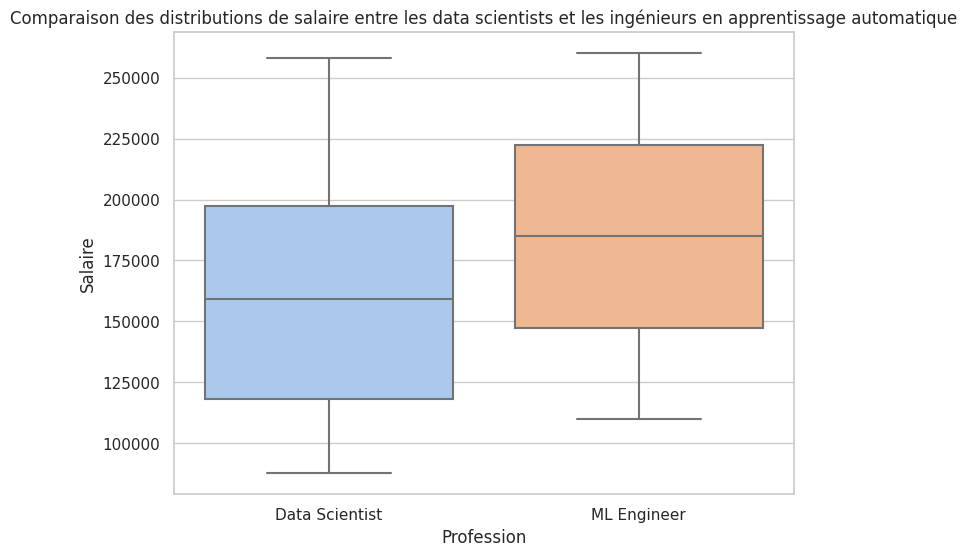

In [ ]:
# Création d'un graphique de boîte à moustaches
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=df,
    x="job_title",
    y="salary_in_usd",
    palette="pastel",
)

# Ajouter des titres et des étiquettes
plt.title("Comparaison des distributions de salaire entre les data scientists et les ingénieurs en apprentissage automatique")
plt.xlabel("Profession")
plt.ylabel("Salaire")

# Affichage du graphique
plt.show()





RIDGELINE PLOT
Je comparerai la difference de salaire entre un data scientist et un ingenieur en data


In [ ]:
df

,job_title,salary_in_usd,employee_residence,experience_level
3,Data Scientist,175000,CA,SE
4,Data Scientist,120000,CA,SE
7,Data Scientist,219000,CA,SE
8,Data Scientist,141000,CA,SE
213,Data Scientist,224000,CA,SE
214,Data Scientist,176000,CA,SE
461,Data Scientist,258000,CA,SE
462,Data Scientist,190000,CA,SE
625,Data Scientist,258000,CA,SE
626,Data Scientist,190000,CA,SE


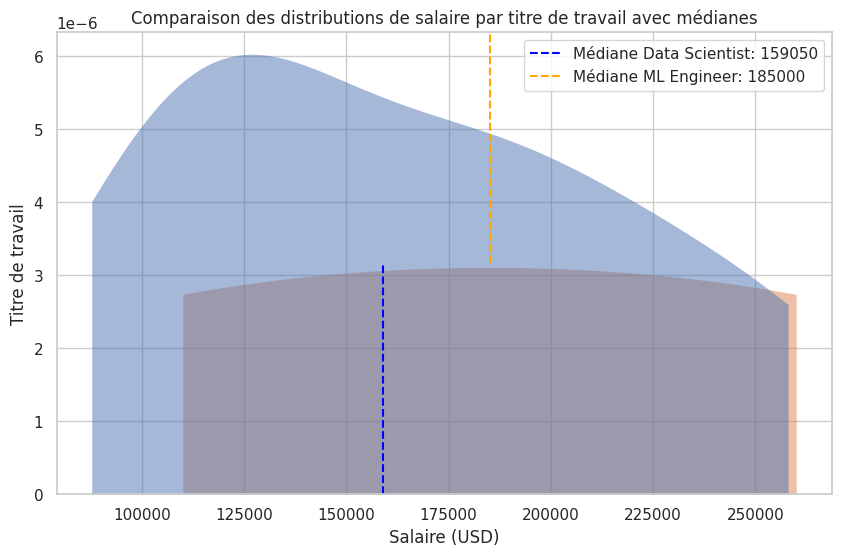

In [ ]:


# Calculer les médianes des salaires pour chaque groupe
data_scientists = df[df["job_title"] == "Data Scientist"]["salary_in_usd"]
ml_engineers = df[df["job_title"] == "ML Engineer"]["salary_in_usd"]
median_data_scientists = np.median(data_scientists)
median_ml_engineers = np.median(ml_engineers)

# Créer un Ridgeline Plot avec Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
g = sns.kdeplot(data=df, x="salary_in_usd", hue="job_title", common_norm=False, alpha=.5, linewidth=0, fill=True, cut=0)

# Ajouter des lignes verticales pour les médianes des salaires
g.axvline(x=median_data_scientists, ymin=0, ymax=0.5, color='blue', linestyle='--', label=f"Médiane Data Scientist: {median_data_scientists:.0f}")
g.axvline(x=median_ml_engineers, ymin=0.5, ymax=1, color='orange', linestyle='--', label=f"Médiane ML Engineer: {median_ml_engineers:.0f}")

# Ajouter des légendes et des étiquettes
plt.title("Comparaison des distributions de salaire par titre de travail avec médianes")
plt.xlabel("Salaire (USD)")
plt.ylabel("Titre de travail")
plt.legend()
plt.show()

Violin plot 

In [ ]:
df

,job_title,salary_in_usd,employee_residence,experience_level
3,Data Scientist,175000,CA,SE
4,Data Scientist,120000,CA,SE
7,Data Scientist,219000,CA,SE
8,Data Scientist,141000,CA,SE
213,Data Scientist,224000,CA,SE
214,Data Scientist,176000,CA,SE
461,Data Scientist,258000,CA,SE
462,Data Scientist,190000,CA,SE
625,Data Scientist,258000,CA,SE
626,Data Scientist,190000,CA,SE


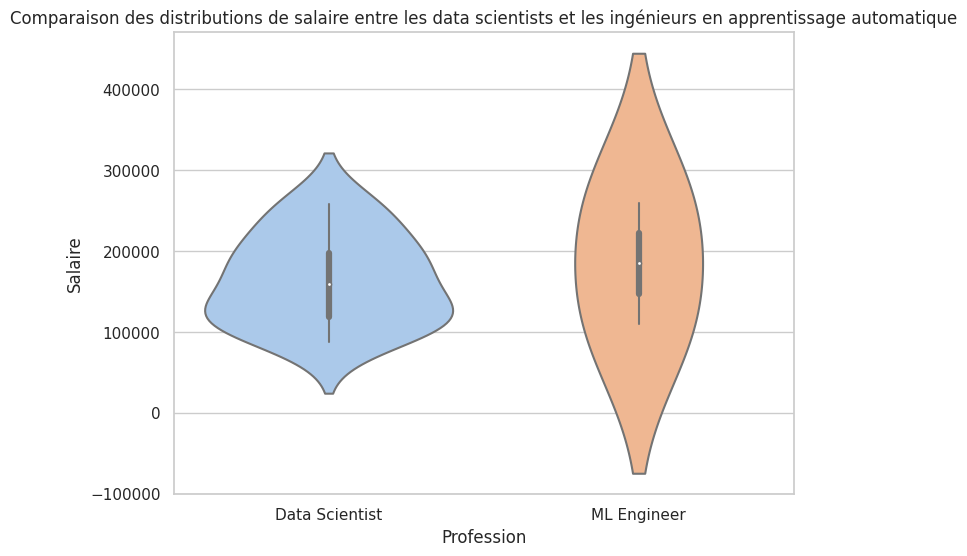

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="job_title", y="salary_in_usd", palette="pastel")
plt.title("Comparaison des distributions de salaire entre les data scientists et les ingénieurs en apprentissage automatique")
plt.xlabel("Profession")
plt.ylabel("Salaire")
plt.show()

Clustering de vos données en utilisant la libraire de ClusterMap

Cette approche nous permet d'obtenir une représentation visuelle des salaires medians pour chaque lieu de résidence. (Japon et Canada)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df =pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df = df.loc[((df['job_title'] == 'Data Scientist') | (df['job_title'] == 'ML Engineer')) & ((df['employee_residence'] == 'CA') | (df['employee_residence'] == 'JP'))]
df = df[['job_title','salary_in_usd','employee_residence']]


In [ ]:
df

,job_title,salary_in_usd,employee_residence
3,Data Scientist,175000,CA
4,Data Scientist,120000,CA
7,Data Scientist,219000,CA
8,Data Scientist,141000,CA
213,Data Scientist,224000,CA
214,Data Scientist,176000,CA
327,Data Scientist,51753,CA
461,Data Scientist,258000,CA
462,Data Scientist,190000,CA
625,Data Scientist,258000,CA


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:623: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


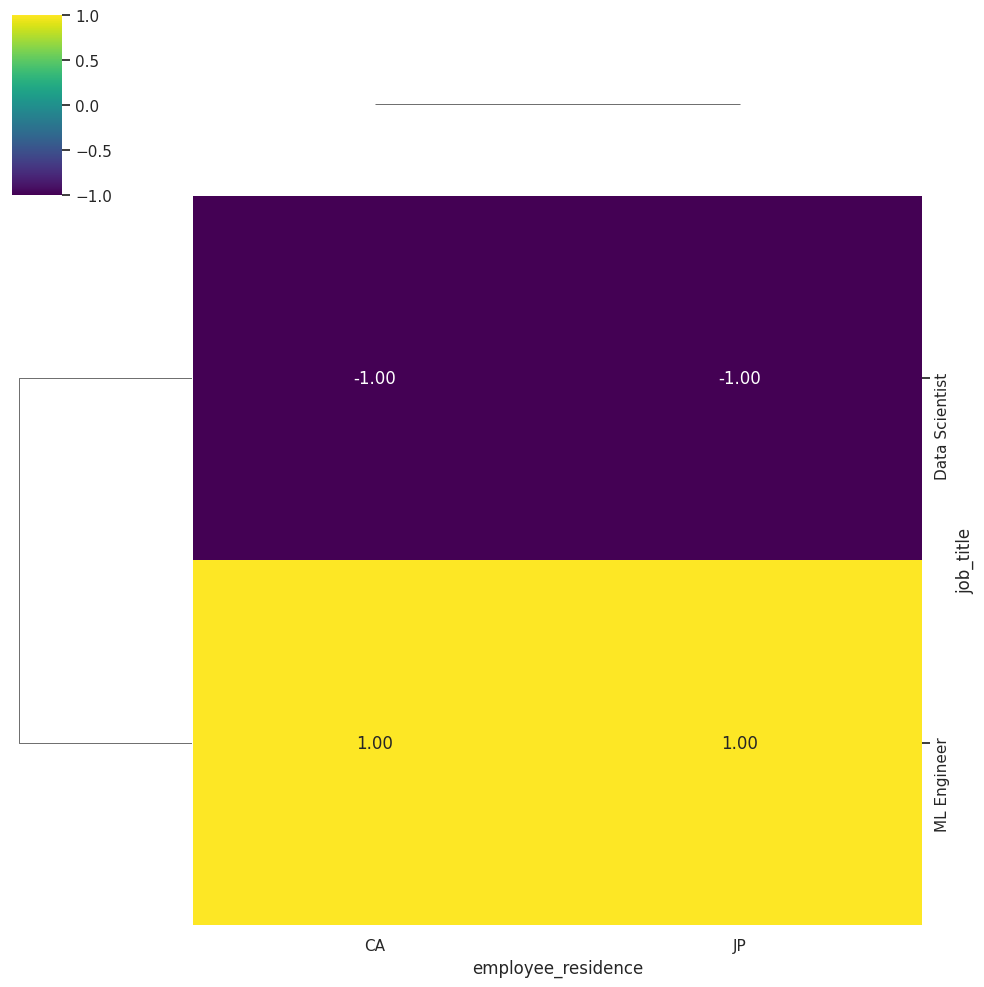

In [ ]:
median_salaries = df.groupby(['job_title', 'employee_residence'])['salary_in_usd'].median().reset_index()
pivot_table = median_salaries.pivot(index='job_title', columns='employee_residence', values='salary_in_usd')
pivot_table = median_salaries.pivot(index='job_title', columns='employee_residence', values='salary_in_usd')
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(pivot_table)
normalized_df = pd.DataFrame(normalized_data, index=pivot_table.index, columns=pivot_table.columns)
sns.clustermap(normalized_df, method='ward', cmap='viridis', annot=True, fmt=".2f")
plt.show()


In [ ]:
# Filtrer les data scientists et les ML engineers
filtered_data = df[df['job_title'].isin(['Data Scientist', 'ML Engineer'])]

# Regrouper les données par lieu de résidence (employee_residence) et titre de poste (job_title)
grouped_data = filtered_data.groupby(['employee_residence', 'job_title'])

# Calculer la moyenne des salaires en dollars US pour chaque groupe
mean_salaries = grouped_data['salary_in_usd'].mean().unstack()

# Trouver les lieux de résidence où la moyenne des salaires des data scientists est supérieure à celle des ML engineers
higher_salaries = mean_salaries[mean_salaries['Data Scientist'] < mean_salaries['ML Engineer']]

print("Lieux de résidence où la moyenne des salaires des Data Scientists est supérieure à celle des ML Engineers :")
print(higher_salaries)


Lieux de résidence où la moyenne des salaires des Data Scientists est supérieure à celle des ML Engineers :
job_title           Data Scientist  ML Engineer
employee_residence                             
CA                   138567.090909     185000.0
JP                    40000.000000      70537.5


Paradoxe de Simpsons

In [ ]:

# Filtrer les data scientists vivant au Canada (CA)
data_scientists = df[(df['employee_residence'] == 'CA') &
                       (df['job_title'] == 'Data Scientist')]

# Filtrer les ML engineers vivant au Canada (  CA)
ml_engineers = df[(df['employee_residence'] == 'CA') &
                    (df['job_title'] == 'ML Engineer')]

#  médiane des salaires en dollars US pour les data scientists
median_salary_data_scientists = data_scientists['salary_in_usd'].median()

#  médiane des salaires en dollars US pour les ML engineers
median_salary_ml_engineers = ml_engineers['salary_in_usd'].median()

print(f"Médiane des salaires en dollars US pour les Data Scientists vivant au Canada : {median_salary_data_scientists:.2f}")
print(f"Médiane des salaires en dollars US pour les ML Engineers vivant au Canada : {median_salary_ml_engineers:.2f}")


Médiane des salaires en dollars US pour les Data Scientists vivant au Canada : 120000.00
Médiane des salaires en dollars US pour les ML Engineers vivant au Canada : 185000.00


In [ ]:
# Filtrer les data scientists vivant au Japon (JP)
data_scientists = df[(df['employee_residence'] == 'JP') &
                       (df['job_title'] == 'Data Scientist')]

# Filtrer les ML engineers vivant au Japon (JP)
ml_engineers = df[(df['employee_residence'] == 'JP') &
                    (df['job_title'] == 'ML Engineer')]

# Calculer la médiane des salaires en dollars US pour les data scientists
median_salary_data_scientists = data_scientists['salary_in_usd'].median()

# Calculer la médiane des salaires en dollars US pour les ML engineers
median_salary_ml_engineers = ml_engineers['salary_in_usd'].median()

print(f"Médiane des salaires en dollars US pour les Data Scientists vivant au Japon : {median_salary_data_scientists:.2f}")
print(f"Médiane des salaires en dollars US pour les ML Engineers vivant au Japon : {median_salary_ml_engineers:.2f}")

Médiane des salaires en dollars US pour les Data Scientists vivant au Japon : 40000.00
Médiane des salaires en dollars US pour les ML Engineers vivant au Japon : 70537.50


In [ ]:
# Filtrer les data scientists vivant au Canada (CA) ou au Japon (JP)
data_scientists = df[(df['employee_residence'].isin(['CA', 'JP'])) &
                       (df['job_title'] == 'Data Scientist')]

# Filtrer les ML engineers vivant au Canada (CA) ou au Japon (JP)
ml_engineers = df[(df['employee_residence'].isin(['CA', 'JP'])) &
                    (df['job_title'] == 'ML Engineer')]

# Calculer la médiane des salaires en dollars US pour les data scientists
median_salary_data_scientists = data_scientists['salary_in_usd'].median()

# Calculer la médiane des salaires en dollars US pour les ML engineers
median_salary_ml_engineers = ml_engineers['salary_in_usd'].median()

print(f"Médiane des salaires en dollars US pour les Data Scientists vivant au Canada ou au Japon (CA_JP) : {median_salary_data_scientists:.2f}")
print(f"Médiane des salaires en dollars US pour les ML Engineers vivant au Canada ou au Japon (CA_JP) : {median_salary_ml_engineers:.2f}")

Médiane des salaires en dollars US pour les Data Scientists vivant au Canada ou au Japon (CA_JP) : 120000.00
Médiane des salaires en dollars US pour les ML Engineers vivant au Canada ou au Japon (CA_JP) : 93682.00


L'on constate bien que la tendance s'inverse lorsqu`on regroupe les donnees

Dans cette deuxieme partie du probleme , nous allons tenter de filtrer les donnees afin de savoir le salaire en fonction du ratio de travail

In [ ]:
!pip install umap-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=471272588501ec8bd6043f541d744078deee9dad35683a1222c9c5afd2510aad
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55640 sha256=79676ae5cc43c3b98616a950bff849db6a548974df99092ddfcc1798d7ebd81c
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:

data = pd.read_csv('ds_salaries.csv')
df = pd.read_csv('ds_salaries.csv')


In [ ]:

# Sélectionner les colonnes pertinentes pour l'analyse
df = df[['job_title', 'salary_in_usd', 'employee_residence', 'experience_level']]



In [ ]:
# Sélectionner uniquement les emplois de niveau Senior
df_senior = df[df['experience_level'] == 'SE']



In [ ]:
# Encoder les variables catégorielles en utilisant One-Hot Encoding
df_senior_encoded = pd.get_dummies(df_senior, columns=['job_title', 'salary_in_usd'])


In [ ]:
# Sélection des colonnes à utiliser pour la réduction de dimensionnalité
X = data[['salary_in_usd', 'remote_ratio']]




In [ ]:
# Standardisation des données
from sklearn.preprocessing import StandardScaler

# Appliquer la transformation de normalisation aux colonnes sélectionnées
scaler = StandardScaler()
df_senior_encoded_std = scaler.fit_transform(X)


In [ ]:
# Appliquer l'algorithme PCA pour réduire la dimensionnalité des données
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_senior_encoded_std)



PCA

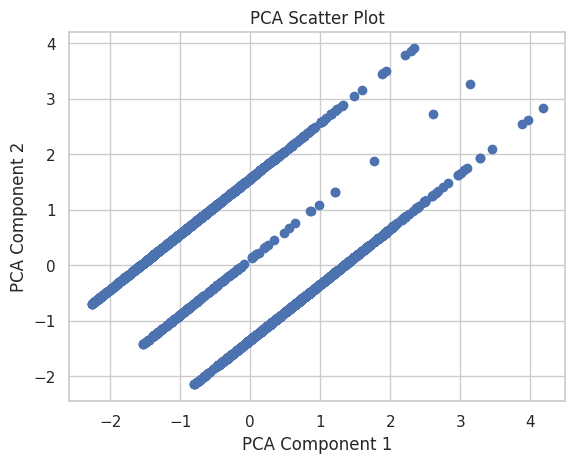

In [ ]:
# Visualiser les résultats de PCA
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Scatter Plot')
plt.show()



In [ ]:

# Appliquer l'algorithme t-SNE pour réduire la dimensionnalité des données
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df_senior_encoded_std)


t-SNE

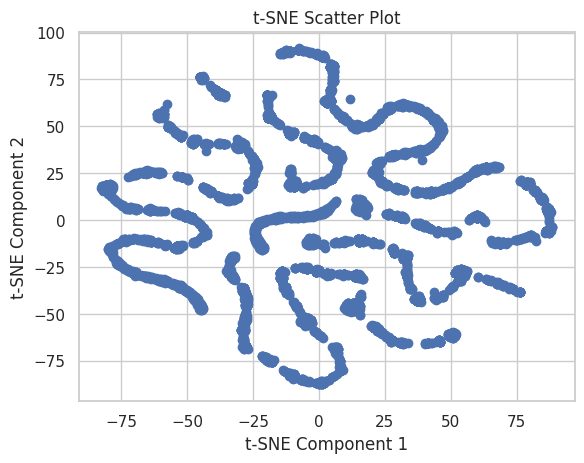

In [ ]:
# Visualiser les résultats de t-SNE
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Scatter Plot')
plt.show()



In [ ]:

# Appliquer l'algorithme UMAP pour réduire la dimensionnalité des données
import umap
umap_result = umap.UMAP(n_components=2).fit_transform(df_senior_encoded_std)



UMAP

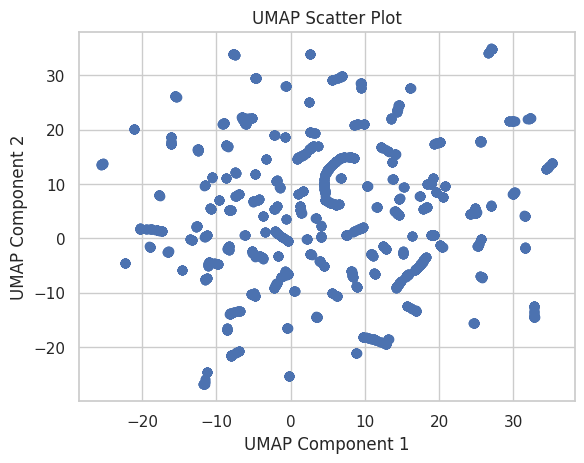

In [ ]:
# Visualiser les résultats de UMAP
plt.scatter(umap_result[:, 0], umap_result[:, 1])
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Scatter Plot')
plt.show()



Les résultats obtenus avec chaque algorithme sont représentés graphiquement avec des nuages de points en deux dimensions. La représentation obtenue avec PCA montre une distribution de points dans un espace en deux dimensions qui reflète l'importance relative des deux variables sélectionnées pour la réduction de dimensionnalité. En revanche, la représentation obtenue avec t-SNE et UMAP montre une structure plus complexe des données, avec des groupes de points qui reflètent des relations non linéaires entre les variables. La représentation obtenue avec UMAP semble être plus détaillée et plus fine que celle obtenue avec t-SNE. En conclusion, le choix de l'algorithme dépendra de l'objectif de l'analyse et de la structure des données.

AVANTAGES : 
        
      PCA:
        Algorithme rapide et efficace en termes de réduction de dimensionnalité.
            
        Permet de visualiser les données en deux ou trois dimensions.


      t-SNE:
          Capable de conserver les relations non linéaires entre les variables.
          
          Peut être utilisé pour la visualisation en deux ou trois dimensions.


      UMAP:
        Efficace pour capturer les relations non linéaires entre les variables.
        
        Peut être utilisé pour la visualisation en deux ou trois dimensions.

INCONVENIENTS : 
        
      PCA:
        Ne prend pas en compte les relations non linéaires entre les variables.


      t-SNE:
          Ne garantit pas une représentation unique des données.


      UMAP:
        Comme pour t-SNE, la représentation des données n'est pas unique.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Application de l'algorithme DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)


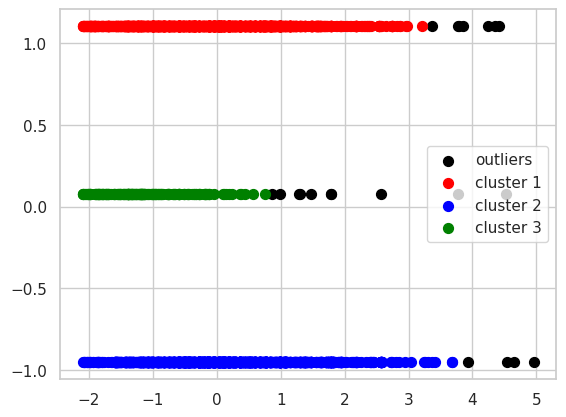

In [ ]:
# Affichage des résultats
plt.scatter(X_scaled[dbscan_labels==-1, 0], X_scaled[dbscan_labels==-1, 1], s=50, color='black', label='outliers')
plt.scatter(X_scaled[dbscan_labels==0, 0], X_scaled[dbscan_labels==0, 1], s=50, color='red', label='cluster 1')
plt.scatter(X_scaled[dbscan_labels==1, 0], X_scaled[dbscan_labels==1, 1], s=50, color='blue', label='cluster 2')
plt.scatter(X_scaled[dbscan_labels==2, 0], X_scaled[dbscan_labels==2, 1], s=50, color='green', label='cluster 3')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, normalized_mutual_info_score




In [ ]:
# Définition des modèles de clustering
kmeans = KMeans(n_clusters=3, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)


In [ ]:
# Entraînement des modèles et prédiction des labels
kmeans_labels = kmeans.fit_predict(X)
agglomerative_labels = agglomerative.fit_predict(X)
dbscan_labels = dbscan.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Calcul des scores de silhouette et NMI
kmeans_silhouette = silhouette_score(X, kmeans_labels)
agglomerative_silhouette = silhouette_score(X, agglomerative_labels)
dbscan_silhouette = silhouette_score(X, dbscan_labels)


In [ ]:
kmeans_nmi = normalized_mutual_info_score(data['employee_residence'], kmeans_labels)
agglomerative_nmi = normalized_mutual_info_score(data['employee_residence'], agglomerative_labels)
dbscan_nmi = normalized_mutual_info_score(data['employee_residence'], dbscan_labels)



In [ ]:
# Création du tableau comparatif
results = pd.DataFrame({'Algorithm': ['KMeans', 'Agglomerative', 'DBSCAN'],
                        'Silhouette Score': [kmeans_silhouette, agglomerative_silhouette, dbscan_silhouette],
                        'NMI Score': [kmeans_nmi, agglomerative_nmi, dbscan_nmi]})




In [ ]:
# Affichage du tableau
print(results)



       Algorithm  Silhouette Score  NMI Score
0         KMeans          0.536096   0.144687
1  Agglomerative          0.534995   0.137272
2         DBSCAN          0.147260   0.116665


Nous utilisons les modèles de clustering KMeans, AgglomerativeClustering et DBSCAN pour prédire les labels pour les données de salaire. Ensuite, les scores de silhouette et NMI sont calculés pour chaque algorithme. Enfin, les résultats sont stockés dans un tableau pandas pour une comparaison facile.